# Cifar 10 and K Nearest Neighbour testing

This is a visual view of the data we obtain from calculating the K Nearest Neighbour for the Cifar 10 challenge.

In [2]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import _pickle as pickle
import os
import scipy
from knn import NearestNeighbour
%matplotlib inline

In [3]:
def load_CIFAR_batch(file):
    """ load single batch of cifar"""
    with open(file, 'rb') as f:
        datadict = pickle.load(f, encoding = 'latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for i in range(1,2):
        f = os.path.join(ROOT, 'data_batch_%d' % (i, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X,Y
    """
    Xtr, Ytr = training data
    Xte, Yte = testing data
    """
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


In [12]:
def visualize_sample(X_train, y_train, classes, samples_per_class=10):
    """visualize some samples in the training datasets """
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

# Example of what we expect in our sample

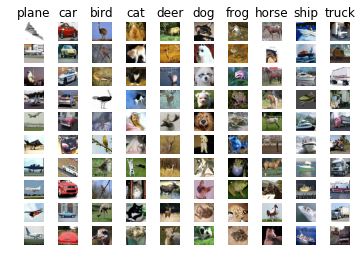

In [13]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Xtr, Ytr, Xte, Yte = load_CIFAR10('cifar-10-batches-py')
visualize_sample(Xtr, Ytr, classes)

In [15]:
def run_knn(Xtr,Ytr,Xte,Yte):
    
    # flattens out all images to be one dimensional
    Xtr_rows = Xtr.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows become 50000x 3072
    Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xtr_rows become 10000x 3072

    # assume we have Xtr_rows, Ytr, Xte_rows, Yte as before
    # recall Xtr_rows is 50,000 x 3072 matrix
    # Xval_rows = Xtr_rows[:1000, :] # take first 1000 for validation
    # Yval = Ytr[:1000]
    # Xtr_rows = Xtr_rows[1000:,:] # keep last 49,000 for train
    # Ytr = Ytr[1000:]

    validation_accuracies = []
    for k in [1]:
        nn = NearestNeighbour() # create a Nearest Neighbor classifier class
        nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels
        Yte_predict = nn.predict(Xte_rows, k) # predict labels on the test images
        # and now print the classification accuracy, which is the average number
        # of examples that are correctly predicted (i.e label matches)
        acc = np.mean(Yte_predict == Yte)
        print ( 'K-NN %d' % (k))
        print ( 'accuracy: %f' % (acc))
        
        validation_accuracies.append((k, acc))
    return Yte_predict

# Predicting the Cifar 10 output
This is the part where we classify the test cases.
Please note that task below takes about 2-3hrs to run and complete the task dependent on CPU
Also note that jupyter notebook with continuous output will eventually put it into a box with scroll bar.

Test case 0: 	 Predicted label is:frog
Test case 1: 	 Predicted label is:ship
Test case 2: 	 Predicted label is:ship
Test case 3: 	 Predicted label is:ship
Test case 4: 	 Predicted label is:deer
Test case 5: 	 Predicted label is:deer
Test case 6: 	 Predicted label is:cat
Test case 7: 	 Predicted label is:bird
Test case 8: 	 Predicted label is:cat
Test case 9: 	 Predicted label is:ship
Test case 10: 	 Predicted label is:plane
Test case 11: 	 Predicted label is:ship
Test case 12: 	 Predicted label is:dog
Test case 13: 	 Predicted label is:frog
Test case 14: 	 Predicted label is:plane
Test case 15: 	 Predicted label is:bird
Test case 16: 	 Predicted label is:dog
Test case 17: 	 Predicted label is:cat
Test case 18: 	 Predicted label is:car
Test case 19: 	 Predicted label is:horse
Test case 20: 	 Predicted label is:bird
Test case 21: 	 Predicted label is:plane
Test case 22: 	 Predicted label is:plane
Test case 23: 	 Predicted label is:deer
Test case 24: 	 Predicted label is:bird
Test case 2

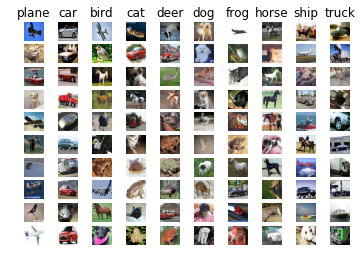

In [16]:
Yte_Predict = run_knn(Xtr,Ytr,Xte,Yte)
visualize_sample(Xte, Yte_Predict, classes)

